# Traning model to identify flowers using Transfer Learning
Use tf_keras package (old way)

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import cv2 
import PIL 
import pathlib
import tensorflow as tf
import tf_keras

from tensorflow import keras
import tensorflow_hub as hub

In [9]:
IMAGE_SHAPE=(224, 224)

In [ ]:
m = tf_keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/140-224-classification/2")
])
m.build([None, 224, 224, 3])

```
Download Goldfish from google

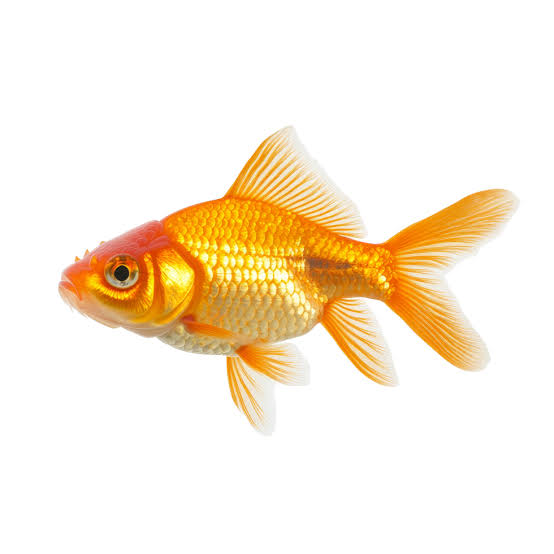

In [13]:
img = 'data/video27/images.jpeg'
PIL.Image.open(img)

In [14]:
# store the resize image
gold_fish = PIL.Image.open(img).resize(IMAGE_SHAPE)

In [16]:
img_bin = np.array(gold_fish)/255.0
img_bin.shape

(224, 224, 3)

In [17]:
img_bin

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [18]:
# predictions take multiple image as input 
img_bin[np.newaxis, ...].shape

(1, 224, 224, 3)

In [19]:
m.predict(img_bin[np.newaxis, ...])

2025-06-22 00:15:44.603011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 5s 5s/step


array([[ 0.11861092,  4.2792835 , 10.0519905 , ..., -2.0481958 ,
        -0.26062644,  1.0870527 ]], dtype=float32)

In [20]:
# here the prediction is made on 1000 classes on which the classifier is trained on 
result = m.predict(img_bin[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 104ms/step


(1, 1001)

In [21]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [25]:
with open('data/video27/ImageNetLabels.txt') as fp:
    image_labels = fp.readlines()
image_labels = [i.strip() for i in image_labels]

In [27]:
image_labels[predicted_label_index]

'goldfish'

### Use this model for flower classification used in Data Augmentation

In [28]:
dataset_loc = 'data/video26/datasets/flower_photos'
dataset_loc = pathlib.Path(dataset_loc)
dataset_loc

PosixPath('data/video26/datasets/flower_photos')

In [29]:
# Create a dictonary of all the flowers and lookup name 
flower_images_dict = {}
for dir_name in dataset_loc.iterdir():
    if dir_name.is_dir():
        flower_images_dict[dir_name.name] = list(dataset_loc.glob(f'{dir_name.name}/*'))

In [31]:
flower_images_dict.keys()

dict_keys(['roses', 'sunflowers', 'daisy', 'dandelion', 'tulips'])

In [30]:
# create another dictionary with flower name and labels 
flower_labels_dict = {}
count = 0
for dir_name in dataset_loc.iterdir():
    if dir_name.is_dir():
        flower_labels_dict[dir_name.name] = count
        count+=1

flower_labels_dict

{'roses': 0, 'sunflowers': 1, 'daisy': 2, 'dandelion': 3, 'tulips': 4}

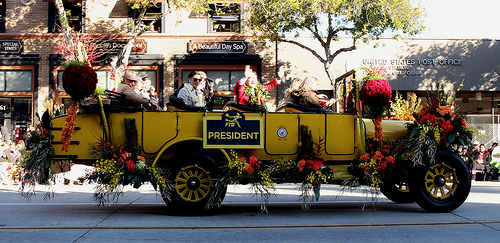

In [32]:
PIL.Image.open(flower_images_dict['roses'][0])

In [33]:
# testing 
img = cv2.imread(flower_images_dict['roses'][0])
img

array([[[ 14,   3,   0],
        [  1,   0,   2],
        [  0,   0,   6],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       [[  0,   0,   9],
        [  0,   0,   4],
        [  4,   7,   5],
        ...,
        [243, 244, 242],
        [243, 244, 242],
        [243, 244, 242]],

       [[  3,  57, 164],
        [ 30,  63, 132],
        [  0,   0,  19],
        ...,
        [244, 245, 243],
        [244, 245, 243],
        [244, 245, 243]],

       ...,

       [[140, 105,  85],
        [146, 112,  89],
        [147, 113,  90],
        ...,
        [155, 125,  96],
        [152, 122,  93],
        [148, 118,  89]],

       [[148, 114,  91],
        [152, 118,  95],
        [150, 116,  93],
        ...,
        [154, 124,  95],
        [152, 122,  93],
        [150, 120,  93]],

       [[153, 119,  96],
        [154, 120,  97],
        [149, 115,  91],
        ...,
        [151, 122,  95],
        [153, 123,  94],
        [151, 121,  94]]

In [34]:
img.shape

(243, 500, 3)

In [35]:
img = cv2.resize(img, IMAGE_SHAPE)

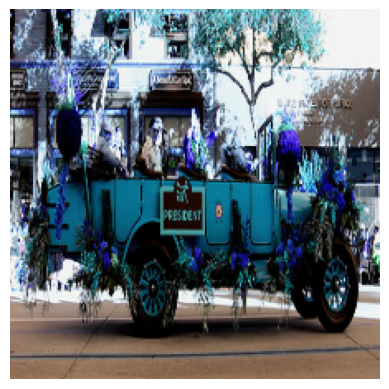

In [36]:
plt.axis('off')
plt.imshow(img)

In [37]:
X, y = [], [] 

# loop over the image dictionary 
for flower_name, image_list in flower_images_dict.items():
    for image in image_list:
        img = cv2.imread(image)
        resized = cv2.resize(img, IMAGE_SHAPE)
        X.append(resized)
        y.append(flower_labels_dict.get(flower_name))

``` 
Convert them to numpy array

In [65]:
list(flower_labels_dict)[list(flower_labels_dict.values())[y[0]]]

'roses'

In [125]:
def plot_image(X, y, flower_labels_dict, index=0):
    plt.axis('off')
    plt.imshow(X[index])

    if flower_labels_dict:
        label_name = list(flower_labels_dict)[list(flower_labels_dict.values())[y[index]]]
        plt.title(label_name)

    


In [38]:
# convert the X and y to numpy array 
X = np.array(X)
y = np.array(y)

In [39]:
# perform test train split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [40]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0 

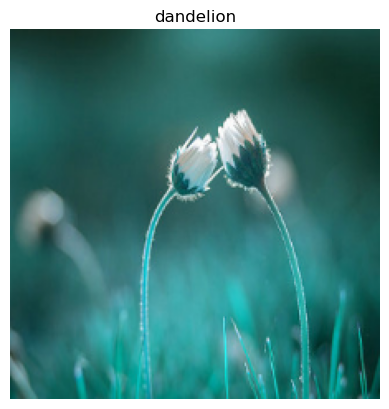

In [70]:
plot_image(X_train, y_train, flower_labels_dict, 9)

``` 
Use MobileNet Classifier as is to predict the dandelion

img_bin[np.newaxis, ...].shape

In [83]:
y_test_pred = m.predict(np.array([X_train_scaled[0], X_train_scaled[1], X_train_scaled[2]]))

1/1 [==============================] - 0s 104ms/step


In [84]:
y_test_class = [np.argmax(i) for i in y_test_pred]
y_test_class

[947, 794, 10]

In [87]:
[image_labels[i] for i in y_test_class]

['cardoon', 'shower cap', 'ostrich']

```
However images were : 

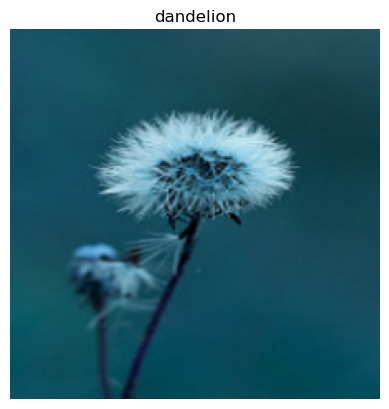

In [126]:
plot_image(X_train_scaled, y_train, flower_labels_dict, 0)

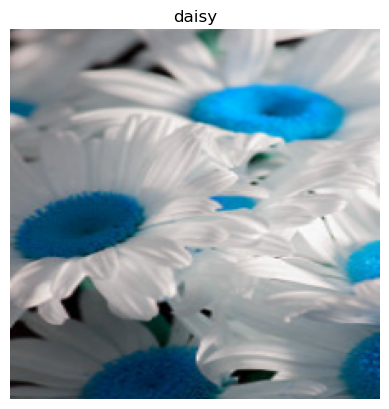

In [127]:
plot_image(X_train_scaled, y_train, flower_labels_dict, 1)

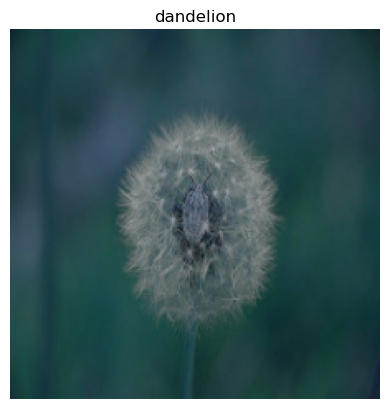

In [128]:
plot_image(X_train_scaled, y_train, flower_labels_dict, 2)

``` 
Take the feature vector model from the tensorflow hub - This model is the same as classification model except it does not have the last layer. 

In [105]:
pretrained_model_without_top_layer = tf_keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/140-224-feature-vector/2",
                   trainable=False)             # means Freezed 
])
pretrained_model_without_top_layer.build([None, 224, 224, 3])

In [112]:
num_of_flowers = 5

model = tf_keras.Sequential([
  pretrained_model_without_top_layer,
  tf_keras.layers.Dense(num_of_flowers)
])

model.build([None, 224, 224, 3])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 1792)              4363712   
                                                                 
 dense_6 (Dense)             (None, 5)                 8965      
                                                                 
Total params: 4372677 (16.68 MB)
Trainable params: 8965 (35.02 KB)
Non-trainable params: 4363712 (16.65 MB)
_________________________________________________________________


In [114]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              optimizer="adam", metrics=["accuracy"])

In [115]:
# train the model 
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 16s 73ms/step - loss: 0.6685 - accuracy: 0.7573
Epoch 2/5
86/86 [==============================] - 6s 72ms/step - loss: 0.3199 - accuracy: 0.8924
Epoch 3/5
86/86 [==============================] - 6s 74ms/step - loss: 0.2346 - accuracy: 0.9262
Epoch 4/5
86/86 [==============================] - 6s 72ms/step - loss: 0.1874 - accuracy: 0.9440
Epoch 5/5
86/86 [==============================] - 6s 71ms/step - loss: 0.1522 - accuracy: 0.9582


In [116]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 3s 88ms/step - loss: 0.2678 - accuracy: 0.9139


[0.2677553594112396, 0.913943350315094]

In [117]:
y_pred = model.predict(X_test)

29/29 [==============================] - 3s 80ms/step


In [118]:
y_pred[:10]

array([[-3.2988377 ,  0.02071065, -4.61494   , -4.1047254 , -0.75087667],
       [-3.1992607 ,  0.89294726, -3.7354639 , -2.4620142 , -3.6265082 ],
       [-3.435228  , -1.3646957 , -2.4542973 , -5.288741  ,  0.20095588],
       [-5.051613  , -0.9405851 , -2.1132267 , -3.2372646 , -2.3505802 ],
       [-3.5915873 ,  1.2300707 , -2.2192473 , -0.11240383, -3.5865786 ],
       [-6.6586375 , -0.13840476, -2.77377   , -2.3666806 , -4.038883  ],
       [-2.6592252 ,  2.5034359 , -2.3567123 , -1.9359719 , -3.7155414 ],
       [-3.8622231 ,  1.7205331 , -2.6268516 , -0.47351834, -2.6154685 ],
       [-3.9802306 ,  1.9685591 , -2.3093429 , -0.24830885, -3.4555433 ],
       [-5.1188803 ,  1.4152771 , -4.144921  , -2.5730412 , -1.6261766 ]],
      dtype=float32)

In [119]:
y_classes = [np.argmax(i) for i in y_pred]
y_classes[:10]

[1, 1, 4, 1, 1, 1, 1, 1, 1, 1]

In [134]:
list(flower_images_dict.keys())[y_test[2]]

'daisy'

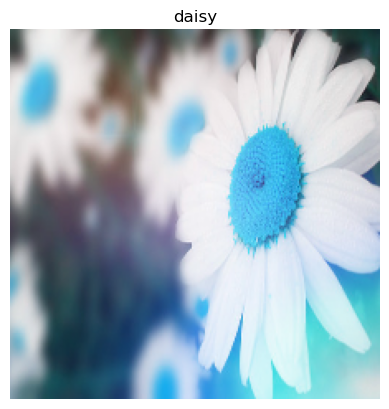

In [130]:
plot_image(X_test_scaled, y_test, flower_labels_dict, index=2)